In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import networkx as nx
import math as math
import time 


from matplotlib.text import Text
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Rectangle, Polygon
from plotly import graph_objects as go
from collections import Counter
from scipy.stats import norm
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.preprocessing import MultiLabelBinarizer # Similar to One-Hot Encoding
from sklearn.feature_extraction.text import TfidfVectorizer #TfidfVectorizer - Transforms text to feature vectors that can be used as input to estimator.
from sklearn.metrics.pairwise import linear_kernel
from sklearn.cluster import MiniBatchKMeans

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [14,14]
plt.rcParams['figure.dpi'] = 100


C:\Users\himan\AppData\Local\Temp\ipykernel_52080\3437252654.py:24: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
df1 = pd.read_csv('netflix_titles.csv')


In [4]:
df1

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                   NaN            NaN   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

              date_added  release_year rating   duration  \
0     September 25, 2021          2020  PG-13     90 min   
1     September 24, 2021          2021  TV-MA  2 Seasons   
2     September 24, 2021          2021  TV-MA   1 Season   
3     September 24, 2021          2021  TV-MA   1 Season   
4     September 24, 2021          2021  TV-MA  2 Seasons   
...                  ...           ...    ...        ...   
8802   November 20, 2019          2007      R    158 min   
8803        July 1, 2019          2018  TV-Y7  2 Seasons   
8804    November 1, 2019          2009      R     88 min   
8805    January 11, 2020          2006     PG     88 min   
8806       March 2, 2019          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  
0     As her father nears the end of his life, filmm...  
1     After crossing paths at a party, a Cape Town t...  
2     To protect his family from a powerful drug lor...  
3     Feuds, flirtations and toilet talk go down amo...  
4     In a city of coaching centers known to train I...  
...                                                 ...  
8802  A political cartoonist, a crime reporter and a...  
8803  While living alone in a spooky town, a young g...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...  

[8807 rows x 12 columns]

In [6]:
df1.describe()

release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
df1.shape

(8807, 12)

In [9]:
df1.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

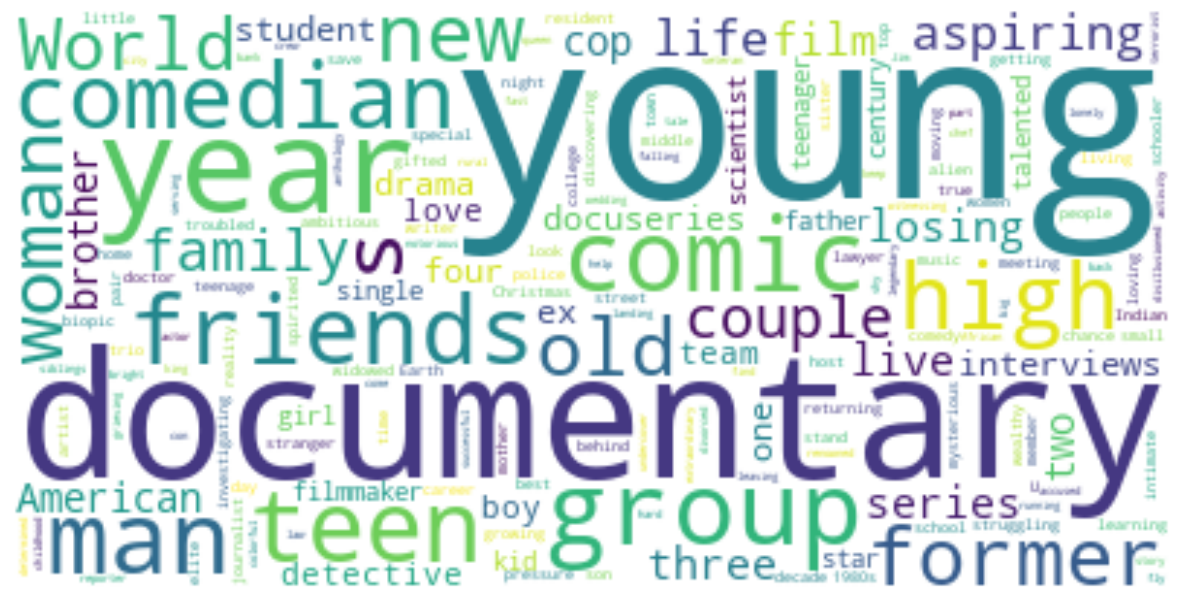

In [10]:
text = " ".join(cat.split()[1] for cat in df1.description)


In [11]:
text

'her crossing protect flirtations a arrival divided. a talented woman boasts to most the following of documents Diego a the the a divorced arcade the love tangled the family’s by big Party Otis of speeds his of Red, young brave, teen an years the another Wiltshire\'s CIA glamorous rookie pair the their Great a powerful bakers accused strange four adventures Naruto on ninja Sasuke story a the middle exclusive writings this the comic a an a timid, cop budding budding his a with this are Ash hiking the a with wakes documentary and and rough and interviews boy\'s Octonauts women intergalactic pressure training family they growing Ross a the thieves filmmakers shark, the lives wealthy drama movie-loving documentary the meeting a he\'s embarking on a gay couple Sam a grieving a a group a the Gabe drama Mick on a lawyer a her pilot by goes Kid Brisby a getting cop day, the Pudding middle Jim responding a nerdy the he flying biopic young team friends Sergio the and tidal world wealthy Dewey in

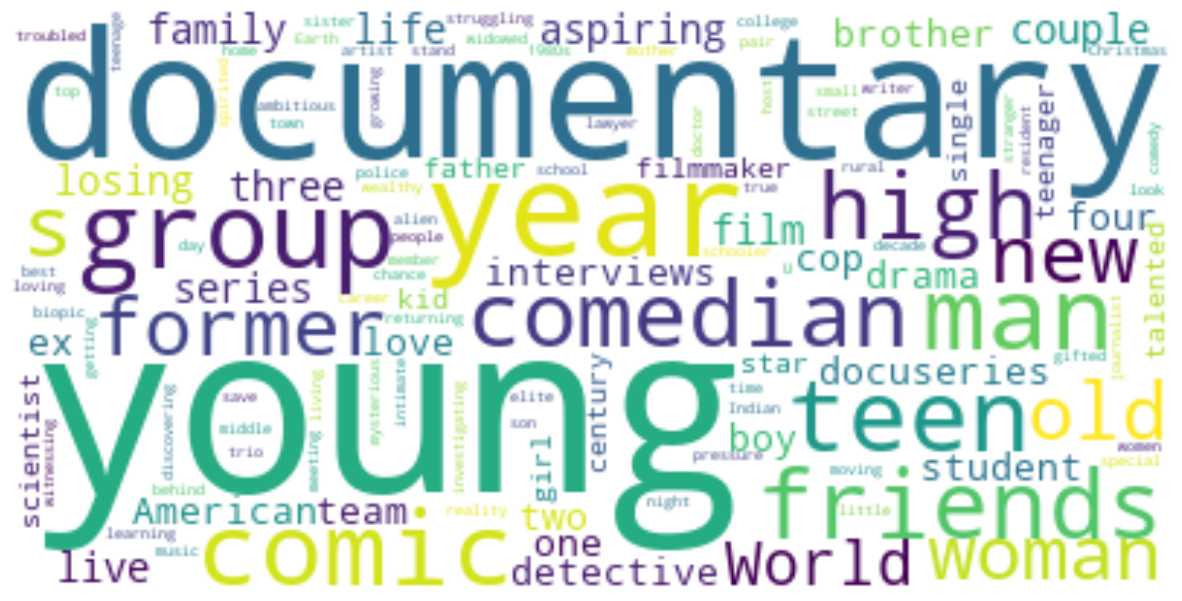

In [12]:
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
# Display the generated Word Cloud
plt.figure(figsize=[15,15])
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
ratings = pd.DataFrame({'Title':df1.title,
                    'Release Year':df1.release_year,
                    'Rating': df1.rating,
                    'Genre':df1.type})
ratings.drop_duplicates(subset=['Title','Release Year','Rating'], inplace=True)
ratings.shape

(8807, 4)

In [14]:
joint_data=ratings.merge(df1,left_on='Title',right_on='title',how='inner')
joint_data=joint_data.sort_values(by='Rating', ascending=False)

In [15]:
country_count=joint_data['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:11]
topcountries

country
United States      2818
India               972
United Kingdom      419
Japan               245
South Korea         199
Canada              181
Spain               145
France              124
Mexico              110
Egypt               106
Turkey              105

In [17]:
fig = go.Figure(go.Funnel(
    y = ["United States", "India", "United Kingdom", "Japan"],
    x = [2818,972,419,245],
    textposition = "inside",
    textinfo = "value+percent initial",
    opacity = 0.65, marker = {"color": ["firebrick", "lightsalmon", "tan", "teal"],
    "line": {"width": [5, 5, 4,4,3,3], "color": ["wheat", "wheat", "blue", "wheat"]}},
    connector = {"line": {"color": "royalblue", "dash": "dot", "width": 3}})
    )

fig.show()

In [18]:
netflix_Turkey=df1[df1['country']=='Turkey']
nannef=netflix_Turkey.dropna()

fig = px.treemap(nannef, path=['country','director'],
                  color='director', hover_data=['director','type'],color_continuous_scale='Purples')
fig.show()

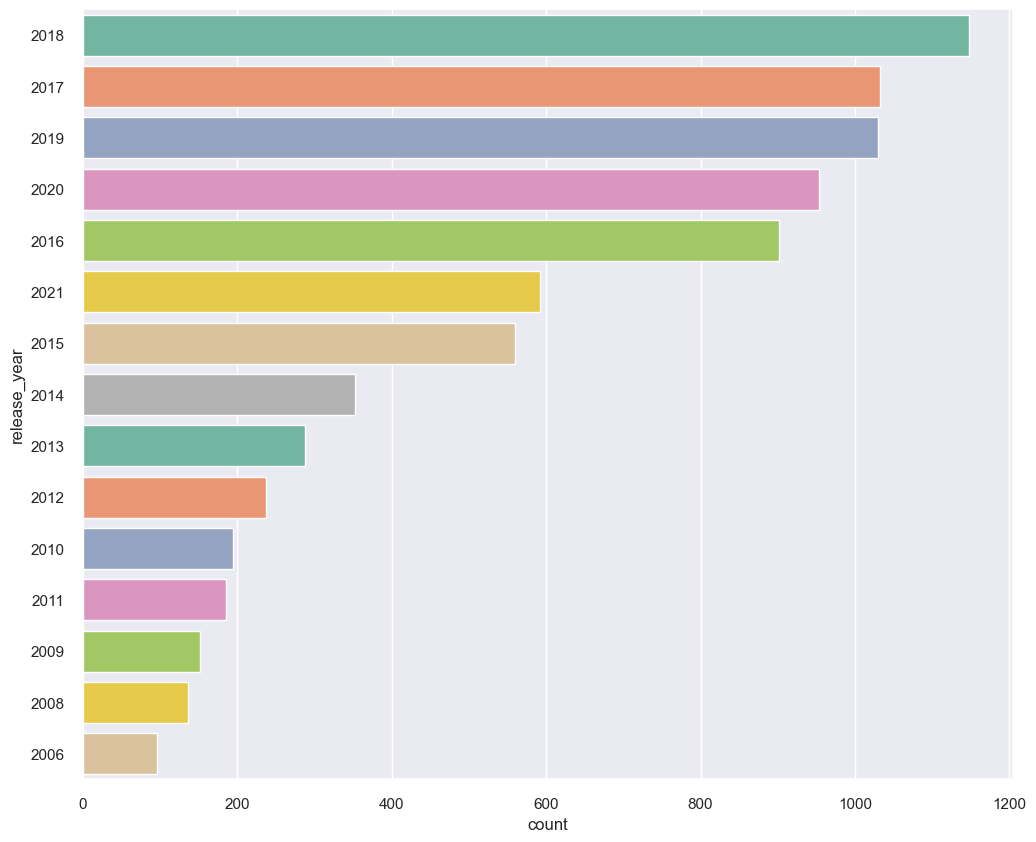

In [19]:
#year wise analysis
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=df1, palette="Set2", order=df1['release_year'].value_counts().index[0:15])

In [20]:
genres=list(df1['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

C:\Users\himan\AppData\Local\Temp\ipykernel_52080\534642084.py:13: UserWarning:

FixedFormatter should only be used together with FixedLocator



Text(0.5, 1.0, 'Genres')

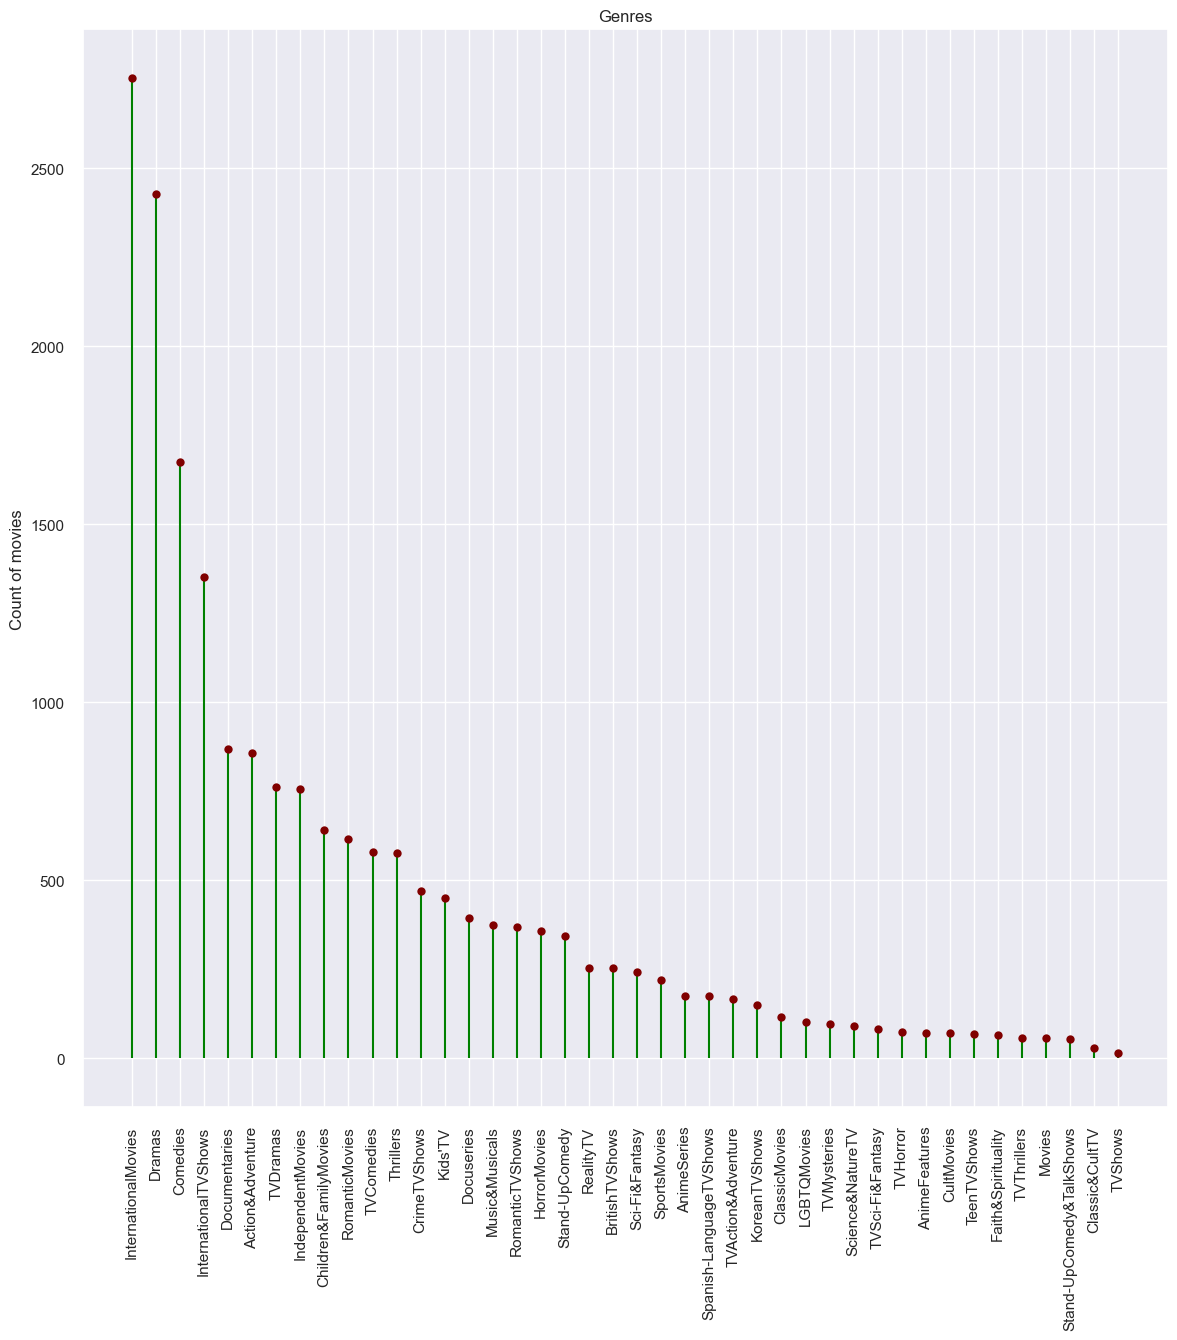

<Figure size 1500x1500 with 0 Axes>

In [22]:
#Lollipop plot of Genres vs their count on Netflix

g={k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= True)}


fig, ax = plt.subplots()

fig = plt.figure(figsize = (15, 15))
x=list(g.keys())
y=list(g.values())
ax.vlines(x, ymin=0, ymax=y, color='green')
ax.plot(x,y, "o", color='maroon')
ax.set_xticklabels(x, rotation = 90)
ax.set_ylabel("Count of movies")
# set a title
ax.set_title("Genres")

<Axes: >

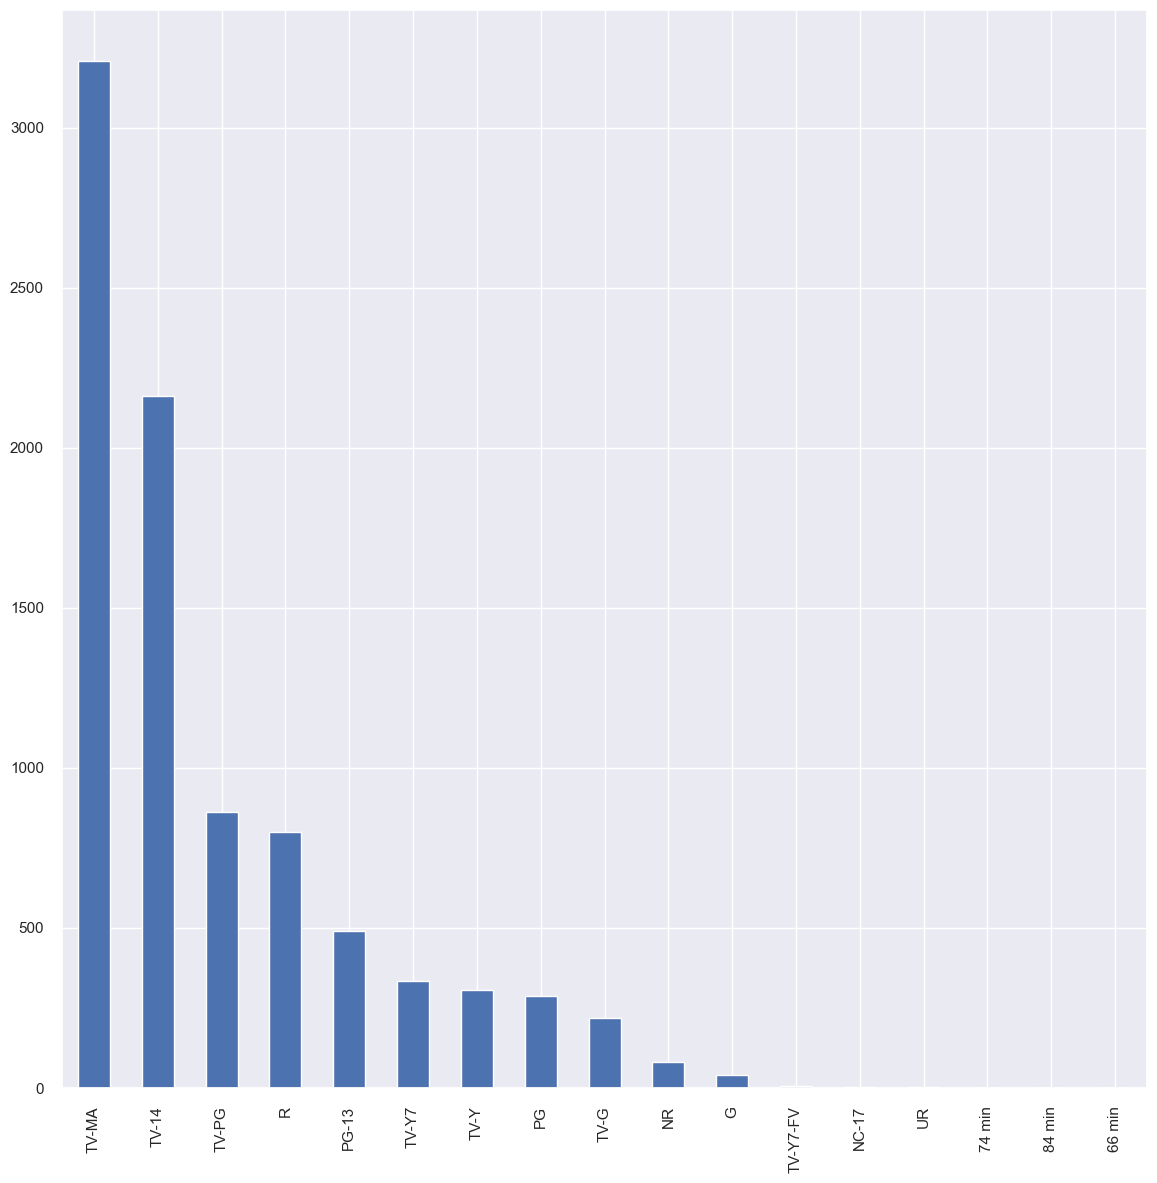

In [23]:
#visualize the distribution of ratings for all titles
#matplotlib df1(x - ratings vs y-total)
allRatings = df1.rating.value_counts()
allRatings.plot(kind='bar')

In [24]:
colors = ['rgba(38, 24, 74, 0.8)', 'rgba(71, 58, 131, 0.8)',
        'rgba(122, 120, 168, 0.8)', 'rgba(164, 163, 204, 0.85)',
        'rgba(190, 192, 213, 1)']

fig = px.histogram(df1, 
                   y="type",
                   orientation='h',
                   width=600,
                   height=350,
                   histnorm='percent',
                   template="plotly_dark"
                   )
fig.update_layout(title="<b>Netflix Content: TV Show vs Movies<b>", 
                  font_family="San Serif",
                  bargap=0.2,
                  barmode='group',
                  titlefont={'size': 28},
                  paper_bgcolor='lightgray',
                  plot_bgcolor='lightgray',
                  legend=dict(
                  orientation="v", 
                      y=1, 
                      yanchor="top", 
                      x=1.250, 
                      xanchor="right",)                 
                  )
annotations = []
annotations.append(dict(xref='paper', yref='paper',
                        x=0.0, y=1.2,
                        text='Netflix mostly produce Movies over TV shows.',
                             font=dict(family='Arial', size=16, color=colors[2]),
                        showarrow=False))
annotations.append(dict(xref='paper', yref='paper',
                        x=0.49, y=0.85,
                        text='30.4%',
                             font=dict(family='Arial', size=20, color=colors[2]),
                        showarrow=False))
annotations.append(dict(xref='paper', yref='paper',
                        x=1.09, y=0.19,
                        text='69.6%',
                             font=dict(family='Arial', size=20, color=colors[2]),
                        showarrow=False))

fig.update_layout(
    autosize=False,
    width=600,
    height=350,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=120,
    ),
)

fig.update_layout(annotations=annotations)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [25]:
df_tv = df1[df1["type"] == "TV Show"]
df_movies = df1[df1["type"] == "Movie"]

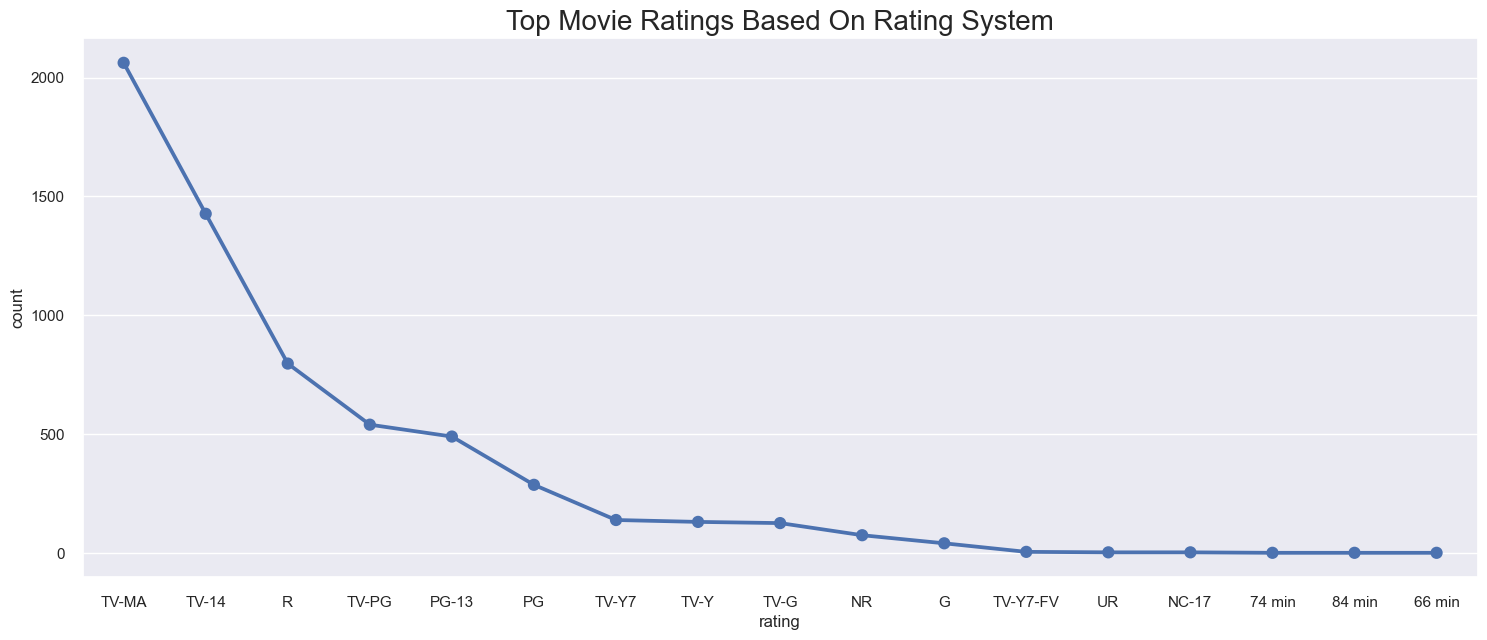

In [26]:
movie_ratings = df_movies.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (18,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=movie_ratings)
plt.title('Top Movie Ratings Based On Rating System',size='20')
plt.show()

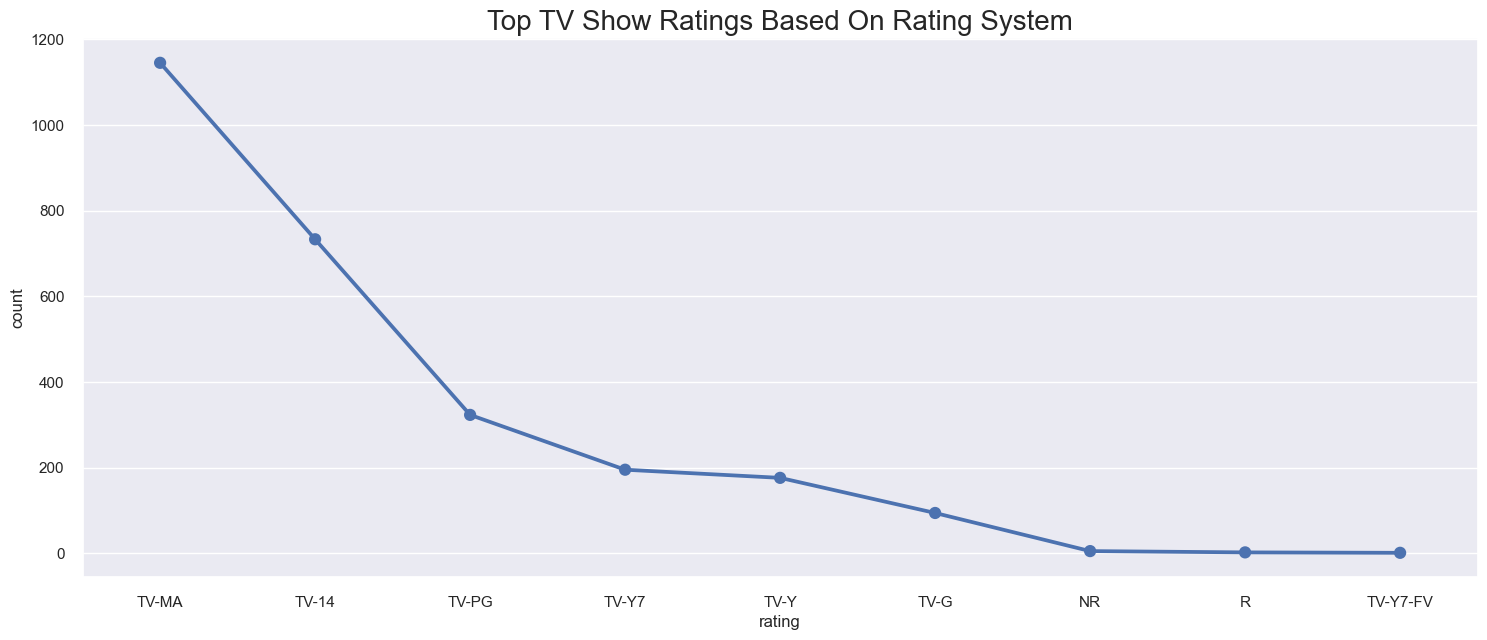

In [27]:
tv_ratings = df_tv.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (18,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('Top TV Show Ratings Based On Rating System',size='20')
plt.show()

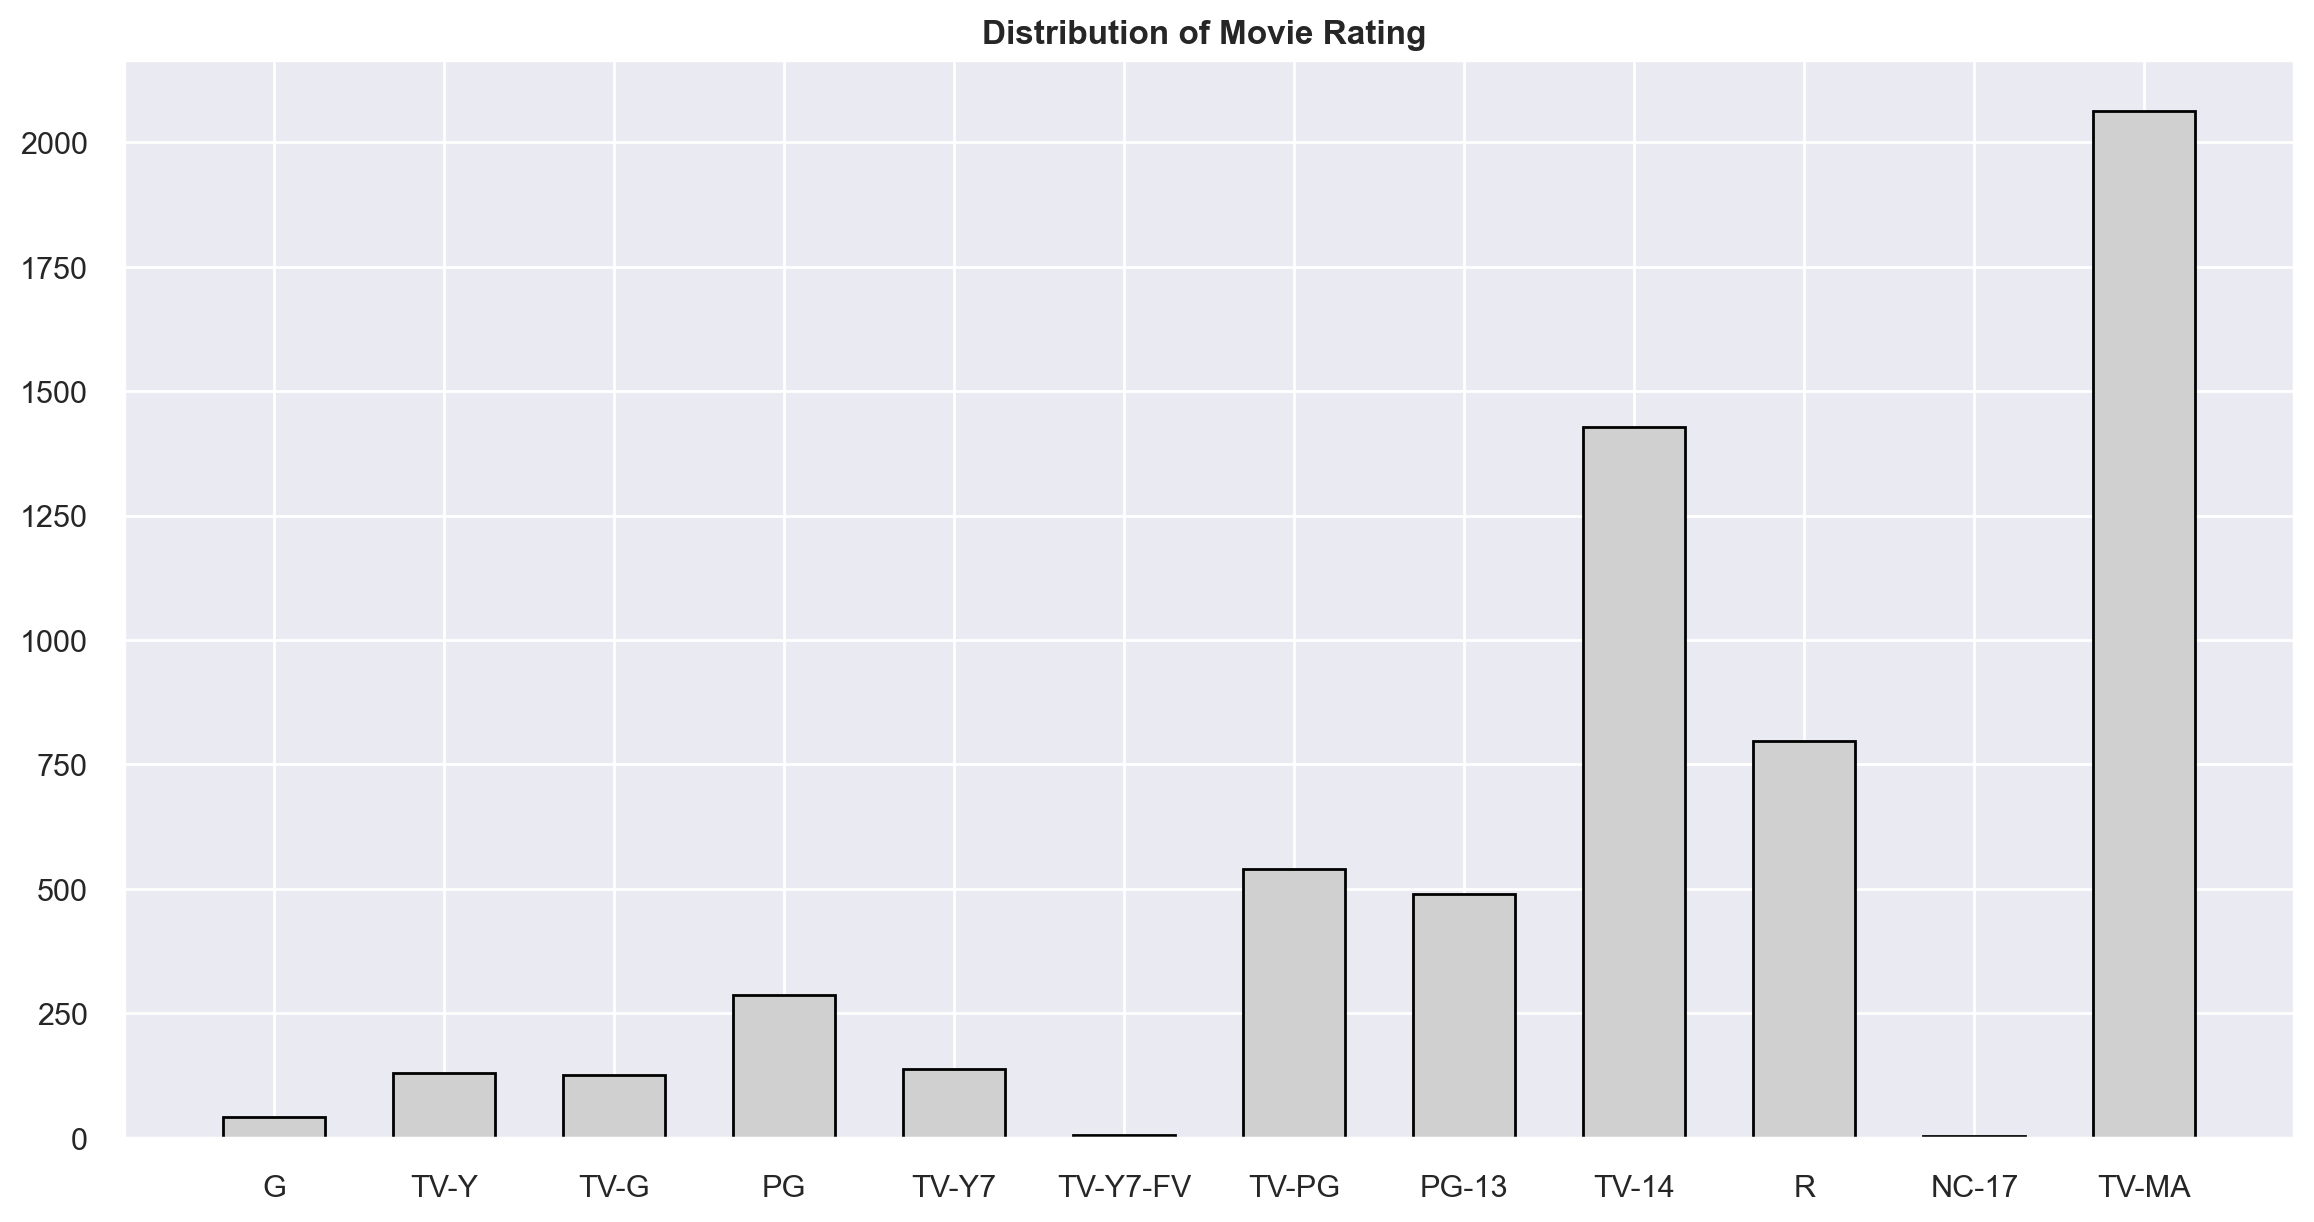

In [28]:
rating_order_movie =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
rating_order_tv =  [ 'TV-Y', 'TV-G', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'TV-14', 'R', 'TV-MA']
movie_rating = df_movies['rating'].value_counts()[rating_order_movie]



fig, ax = plt.subplots(1, 1, figsize=(14, 7), dpi=200)
ax.bar(movie_rating.index, movie_rating,  color="#d0d0d0", width=0.6, edgecolor='black')
ax.set_title(f'Distribution of Movie Rating ', fontweight='bold')
plt.show()

In [29]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df1['target_ages'] = df1['rating'].replace(ratings_ages)
df1['target_ages'].unique()

array(['Teens', 'Adults', 'Older Kids', 'Kids', '74 min', '84 min',
       '66 min', nan], dtype=object)

In [30]:
def generate_rating_df(df1):
    rating_df = df1.groupby(['rating', 'target_ages']).agg({'show_id': 'count'}).reset_index()
    rating_df = rating_df[rating_df['show_id'] != 0]
    rating_df.columns = ['rating', 'target_ages', 'counts']
    rating_df = rating_df.sort_values('target_ages')
    return rating_df

In [31]:
rating_df = generate_rating_df(df1)
fig = px.bar(rating_df, x='rating', y='counts', color='target_ages', title='Ratings of Movies And TV Shows Based On Target Age Groups',  labels={'counts':'COUNT', 'rating':'RATINGS', 'target_ages':'TARGET AGE GROUPS' })
fig.show()

In [32]:
rating_order_movie =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
rating_order_tv =  [ 'TV-Y', 'TV-G', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'TV-14', 'R', 'TV-MA']
movie_rating = df_movies['rating'].value_counts()[rating_order_movie]
tv_rating = df_tv['rating'].value_counts()[rating_order_tv].fillna(0)
def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(15, 7))
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data,  color="#d0d0d0", width=0.6, edgecolor='black')

    color =  ['green',  'blue',  'orange',  'red']
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.1)

    ax.set_title(f'Distribution of {title} Rating', fontsize=20, fontweight='bold', position=(0.5, 1.0+0.03))
    plt.show()

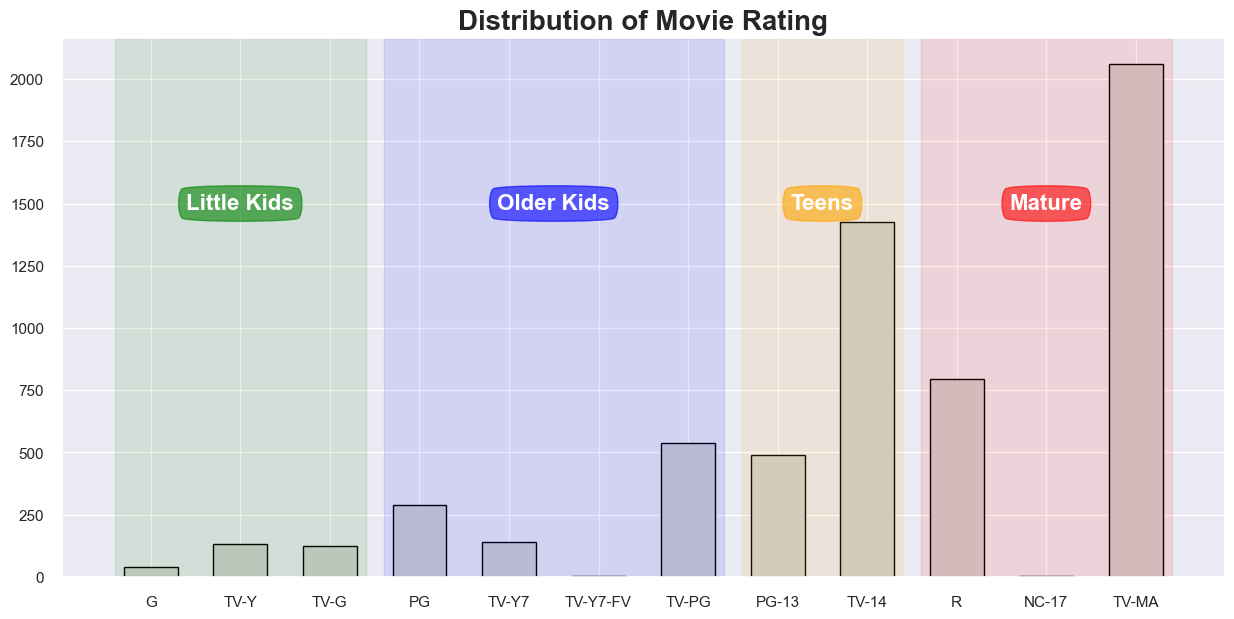

In [33]:
rating_barplot(movie_rating,'Movie', 1500)


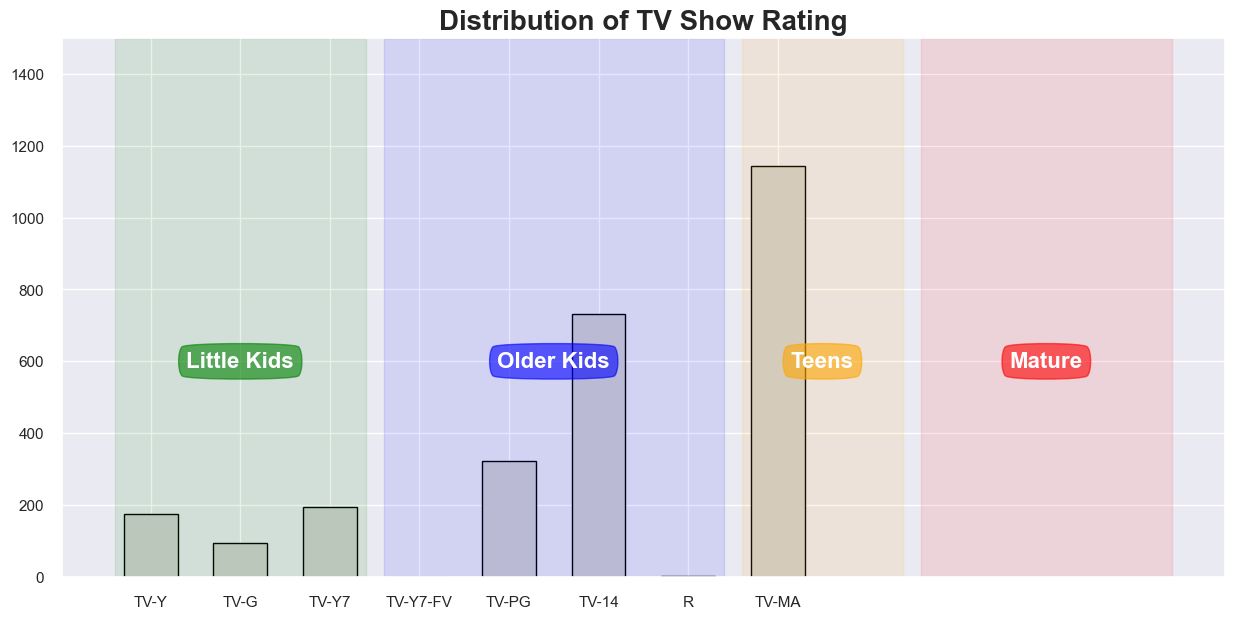

In [34]:
rating_barplot(tv_rating,'TV Show' , 600, 1500)


In [35]:
# preprocessing
sns.set_style('whitegrid') # plot with grid

movie = df1[df1['type'] == 'Movie']
tv_show = df1[df1['type'] == 'TV Show']

rating_order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
movie_rating = movie['rating'].value_counts()[rating_order] 

In [40]:
def relation_heatmap(df1, title):
    # Extract genres from 'listed_in' column
    df1['genre'] = df1['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    
    # Get unique genres
    Types = set([genre for genres in df1['genre'] for genre in genres])
    
    print(f"There are {len(Types)} types in the Netflix {title} Dataset")    
    
    # Apply one-hot encoding to genres
    test = df1['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    
    # Calculate correlation matrix
    corr = res.corr()
    
    # Create a mask to hide the upper triangle of the heatmap
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    
    # Create a heatmap
    fig, ax = plt.subplots(figsize=(15, 14))
    pl = sns.heatmap(corr, mask=mask, cmap="coolwarm", vmax=.5, vmin=-.5, center=0, square=True, linewidths=.7, cbar_kws={"shrink": 0.6})
    
    plt.show()

C:\Users\himan\AppData\Local\Temp\ipykernel_52080\75703762.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



There are 20 types in the Netflix Movie Dataset


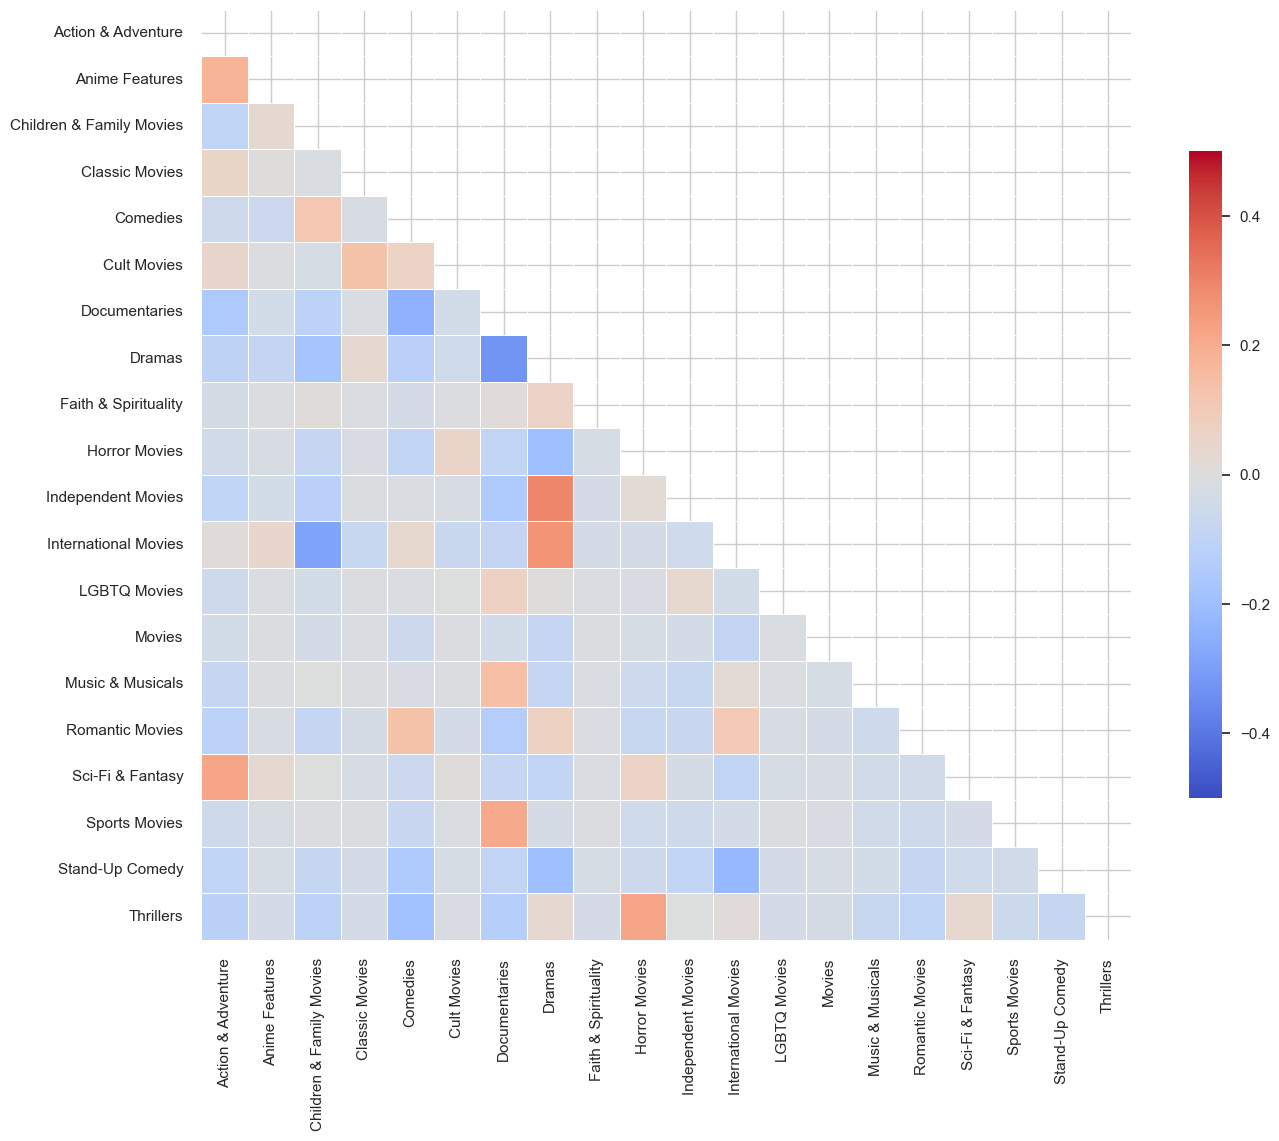

In [41]:
relation_heatmap(movie, 'Movie')


C:\Users\himan\AppData\Local\Temp\ipykernel_52080\75703762.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



There are 22 types in the Netflix TV Show Dataset


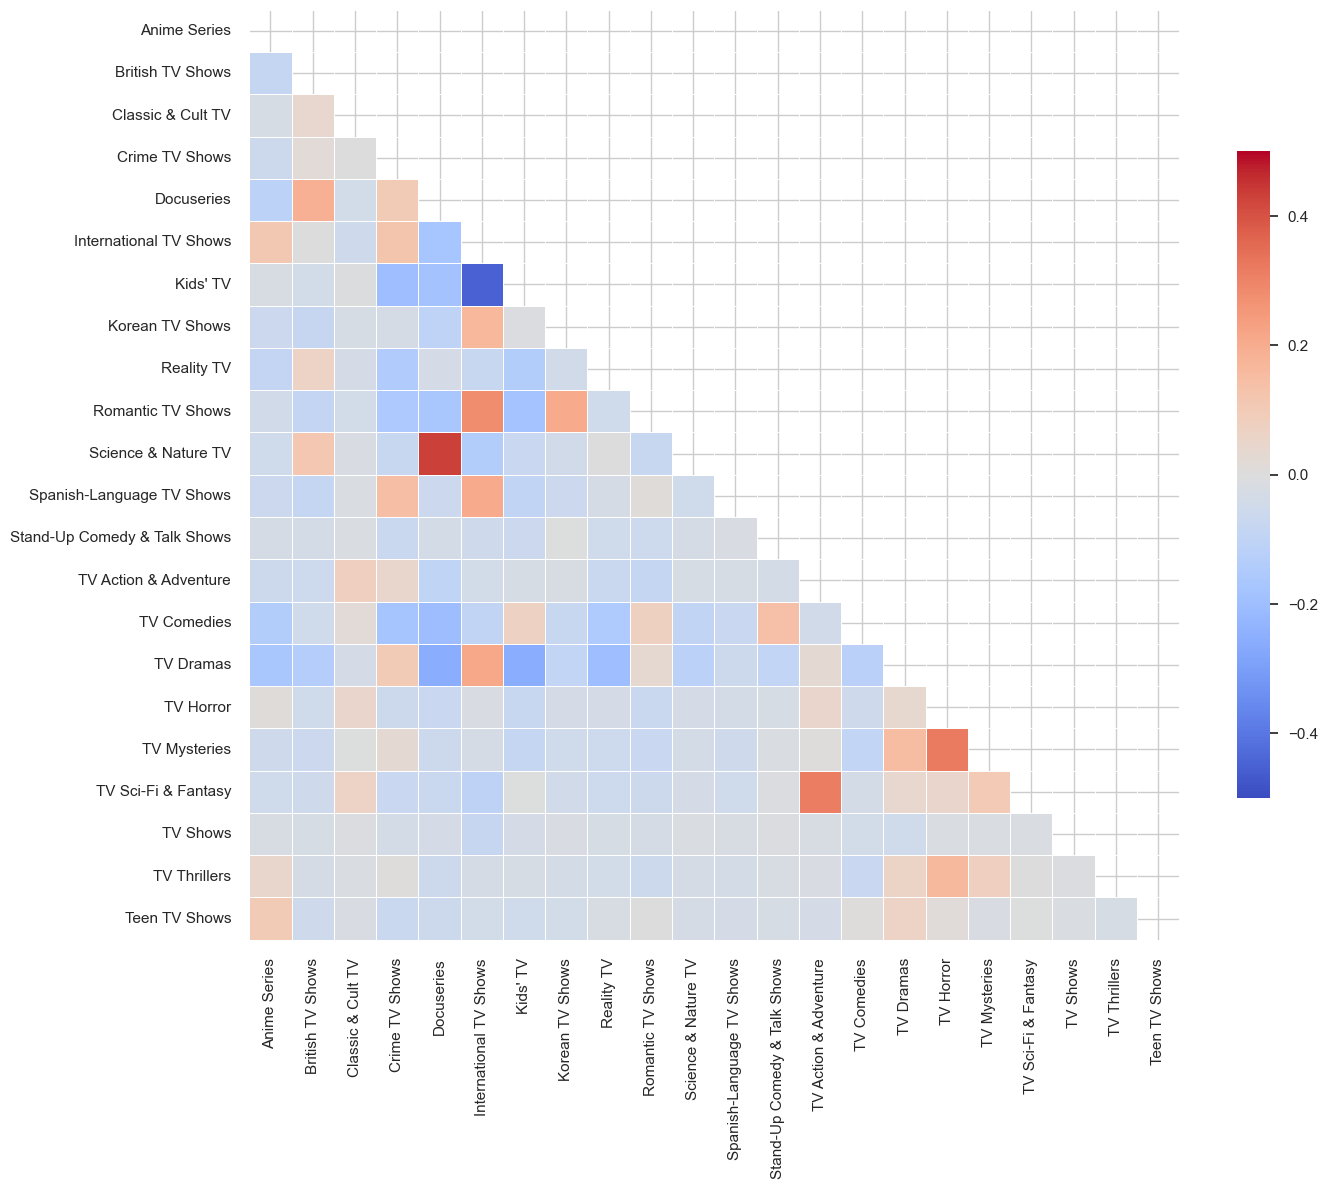

In [42]:
relation_heatmap(tv_show, 'TV Show')


C:\Users\himan\AppData\Local\Temp\ipykernel_52080\3149849189.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




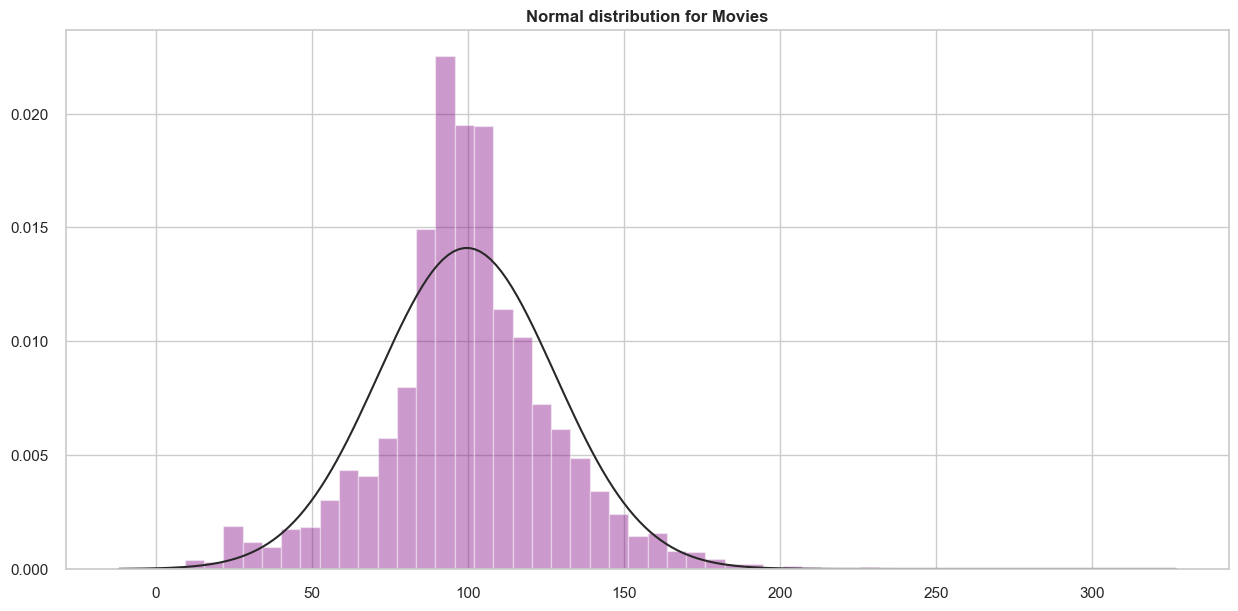

In [43]:
plt.figure(figsize=(15,7))
sns.distplot(df_movies['duration'].str.extract('(\d+)'),fit=norm,kde=False, color=['Purple'])
plt.title('Normal distribution for Movies',fontweight="bold")
plt.show()

In [44]:
fig = px.histogram(x=df_tv['duration'])
fig.update_xaxes(categoryorder="total descending")
fig.update_layout(
    title="Distribution of TV Shows duration",
    xaxis_title="Duration of TV ShowS",
)
fig.show()

In [45]:
def find_similar(tfidf_matrix, index, top_n = 5):
    cosine_similarities = linear_kernel(tfidf_matrix[index:index+1], tfidf_matrix).flatten()
    related_docs_indices = [i for i in cosine_similarities.argsort()[::-1] if i != index]
    return [index for index in related_docs_indices][0:top_n]

In [46]:
df1["date_added"] = pd.to_datetime(df1['date_added'])

df1['directors'] = df1['director'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])
df1['categories'] = df1['listed_in'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])
df1['actors'] = df1['cast'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])
df1['countries'] = df1['country'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])

In [47]:
df1

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                   NaN            NaN   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

     date_added  release_year rating   duration  \
0    2021-09-25          2020  PG-13     90 min   
1    2021-09-24          2021  TV-MA  2 Seasons   
2    2021-09-24          2021  TV-MA   1 Season   
3    2021-09-24          2021  TV-MA   1 Season   
4    2021-09-24          2021  TV-MA  2 Seasons   
...         ...           ...    ...        ...   
8802 2019-11-20          2007      R    158 min   
8803 2019-07-01          2018  TV-Y7  2 Seasons   
8804 2019-11-01          2009      R     88 min   
8805 2020-01-11          2006     PG     88 min   
8806 2019-03-02          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description target_ages  \
0     As her father nears the end of his life, filmm...       Teens   
1     After crossing paths at a party, a Cape Town t...      Adults   
2     To protect his family from a powerful drug lor...      Adults   
3     Feuds, flirtations and toilet talk go down amo...      Adults   
4     In a city of coaching centers known to train I...      Adults   
...                                                 ...         ...   
8802  A political cartoonist, a crime reporter and a...      Adults   
8803  While living alone in a spooky town, a young g...  Older Kids   
8804  Looking to survive in a world taken over by zo...      Adults   
8805  Dragged from civilian life, a former superhero...  Older Kids   
8806  A scrappy but poor boy worms his way into a ty...       Teens   

              directors                                         categories  \
0     [Kirsten Johnson]                                    [Documentaries]   
1   

In [48]:
# Build the tfidf matrix with the descriptions
start_time = time.time()
text_content = df1['description']
vector = TfidfVectorizer(max_df=0.4,         # drop words that occur in more than X percent of documents
                             min_df=1,      # only use words that appear at least X times
                             stop_words='english', # remove stop words
                             lowercase=True, # Convert everything to lower case 
                             use_idf=True,   # Use idf
                             norm=u'l2',     # Normalization
                             smooth_idf=True # Prevents divide-by-zero errors
                            )
tfidf = vector.fit_transform(text_content)

In [49]:
# Clustering  Kmeans
k = 200
kmeans = MiniBatchKMeans(n_clusters = k)
kmeans.fit(tfidf)
centers = kmeans.cluster_centers_.argsort()[:,::-1]
terms = vector.get_feature_names()

request_transform = vector.transform(df1['description'])
# new column cluster based on the description
df1['cluster'] = kmeans.predict(request_transform) 

df1['cluster'].value_counts().head()

C:\Users\himan\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



106    5139
42      775
43      633
46      506
16      306
Name: cluster, dtype: int64

In [50]:
P = nx.Graph(label="MOVIE")
start_time = time.time()
for i, rowi in df1.iterrows():
    if (i%1000==0):
        print(" iter {} -- {} seconds --".format(i,time.time() - start_time))
    P.add_node(rowi['title'],key=rowi['show_id'],label="MOVIE",mtype=rowi['type'],rating=rowi['rating'])
    P.add_node(rowi['cluster'],label="CLUSTER")
    P.add_edge(rowi['title'], rowi['cluster'], label="DESCRIPTION")
    for element in rowi['actors']:
        P.add_node(element,label="PERSON")
        P.add_edge(rowi['title'], element, label="ACTED_IN")
    for element in rowi['categories']:
        P.add_node(element,label="CAT")
        P.add_edge(rowi['title'], element, label="CAT_IN")
    for element in rowi['directors']:
        P.add_node(element,label="PERSON")
        P.add_edge(rowi['title'], element, label="DIRECTED")
    for element in rowi['countries']:
        P.add_node(element,label="COU")
        P.add_edge(rowi['title'], element, label="COU_IN")
    
    indices = find_similar(tfidf, i, top_n = 5)
    snode="Sim("+rowi['title'][:15].strip()+")"        
    P.add_node(snode,label="SIMILAR")
    P.add_edge(rowi['title'], snode, label="SIMILARITY")
    for element in indices:
        P.add_edge(snode, df1['title'].loc[element], label="SIMILARITY")
print(" finish -- {} seconds --".format(time.time() - start_time))

 iter 0 -- 0.014043092727661133 seconds --
 iter 1000 -- 3.130526304244995 seconds --
 iter 2000 -- 7.449785947799683 seconds --
 iter 3000 -- 11.391590595245361 seconds --
 iter 4000 -- 15.113473892211914 seconds --
 iter 5000 -- 19.083136320114136 seconds --
 iter 6000 -- 22.567654609680176 seconds --
 iter 7000 -- 26.59070324897766 seconds --
 iter 8000 -- 30.40781021118164 seconds --
 finish -- 33.415645122528076 seconds --


In [51]:
def get_recommendation(root):
    commons_dict = {}
    for h in P.neighbors(root):
        for h2 in P.neighbors(h):
            if h2==root:
                continue
            if P.nodes[h2]['label']=="MOVIE":
                commons = commons_dict.get(h2)
                if commons==None:
                    commons_dict.update({h2 : [h]})
                else:
                    commons.append(h)
                    commons_dict.update({h2 : commons})
    movies=[]
    weight=[]
    for key, values in commons_dict.items():
        w=0.0
        for h in values:
            w=w+1/math.log(P.degree(h))
        movies.append(key) 
        weight.append(w)
    
    final = pd.Series(data=np.array(weight),index=movies)
    final.sort_values(inplace=True,ascending=False)        
    return final;


In [52]:
final1 = get_recommendation("PK")
final2 = get_recommendation("Ocean's Thirteen")
final3 = get_recommendation("The Devil Inside")
final4 = get_recommendation("Stranger Things")
print("*"*40+"\n Recommendation for 'PK\n"+"*"*40)
print(final1.head())
print("*"*40+"\n Recommendation for 'Ocean's Thirteen'\n"+"*"*40)
print(final2.head())
print("*"*40+"\n Recommendation for 'Belmonte'\n"+"*"*40)
print(final3.head())
print("*"*40+"\n Recommendation for 'Stranger Things'\n"+"*"*40)
print(final4.head())


****************************************
 Recommendation for 'PK
****************************************
3 Idiots                 2.107430
Sanju                    1.729072
Merku Thodarchi Malai    1.631641
Drive                    1.600775
Unbroken                 1.503344
dtype: float64
****************************************
 Recommendation for 'Ocean's Thirteen'
****************************************
Ocean's Twelve       6.210907
Ocean's Eleven       2.281776
The Departed         2.213117
Hostel: Part III     1.796084
Brooklyn's Finest    1.449024
dtype: float64
****************************************
 Recommendation for 'Belmonte'
****************************************
The Boy                                  2.008900
Lying and Stealing                       1.838766
The Devil and Father Amorth              1.408107
Making a Murderer                        1.237974
Belief: The Possession of Janet Moses    1.233254
dtype: float64
****************************************
 Rec

In [53]:
def get_all_adj_nodes(list_in):
    sub_graph=set()
    for q in list_in:
        sub_graph.add(q)
        for h in P.neighbors(q):        
                sub_graph.add(h)
    return list(sub_graph)
def draw_sub_graph(sub_graph):
    subgraph = P.subgraph(sub_graph)
    colors=[]
    for h in subgraph.nodes():
        if P.nodes[h]['label']=="MOVIE":
            colors.append('blue')
        elif P.nodes[h]['label']=="PERSON":
            colors.append('red')
        elif P.nodes[h]['label']=="CAT":
            colors.append('green')
        elif P.nodes[h]['label']=="COU":
            colors.append('yellow')
        elif P.nodes[h]['label']=="SIMILAR":
            colors.append('orange')    
        elif P.nodes[h]['label']=="CLUSTER":
            colors.append('orange')

    nx.draw(subgraph, with_labels=True, font_weight='bold',node_color=colors)
    plt.show()

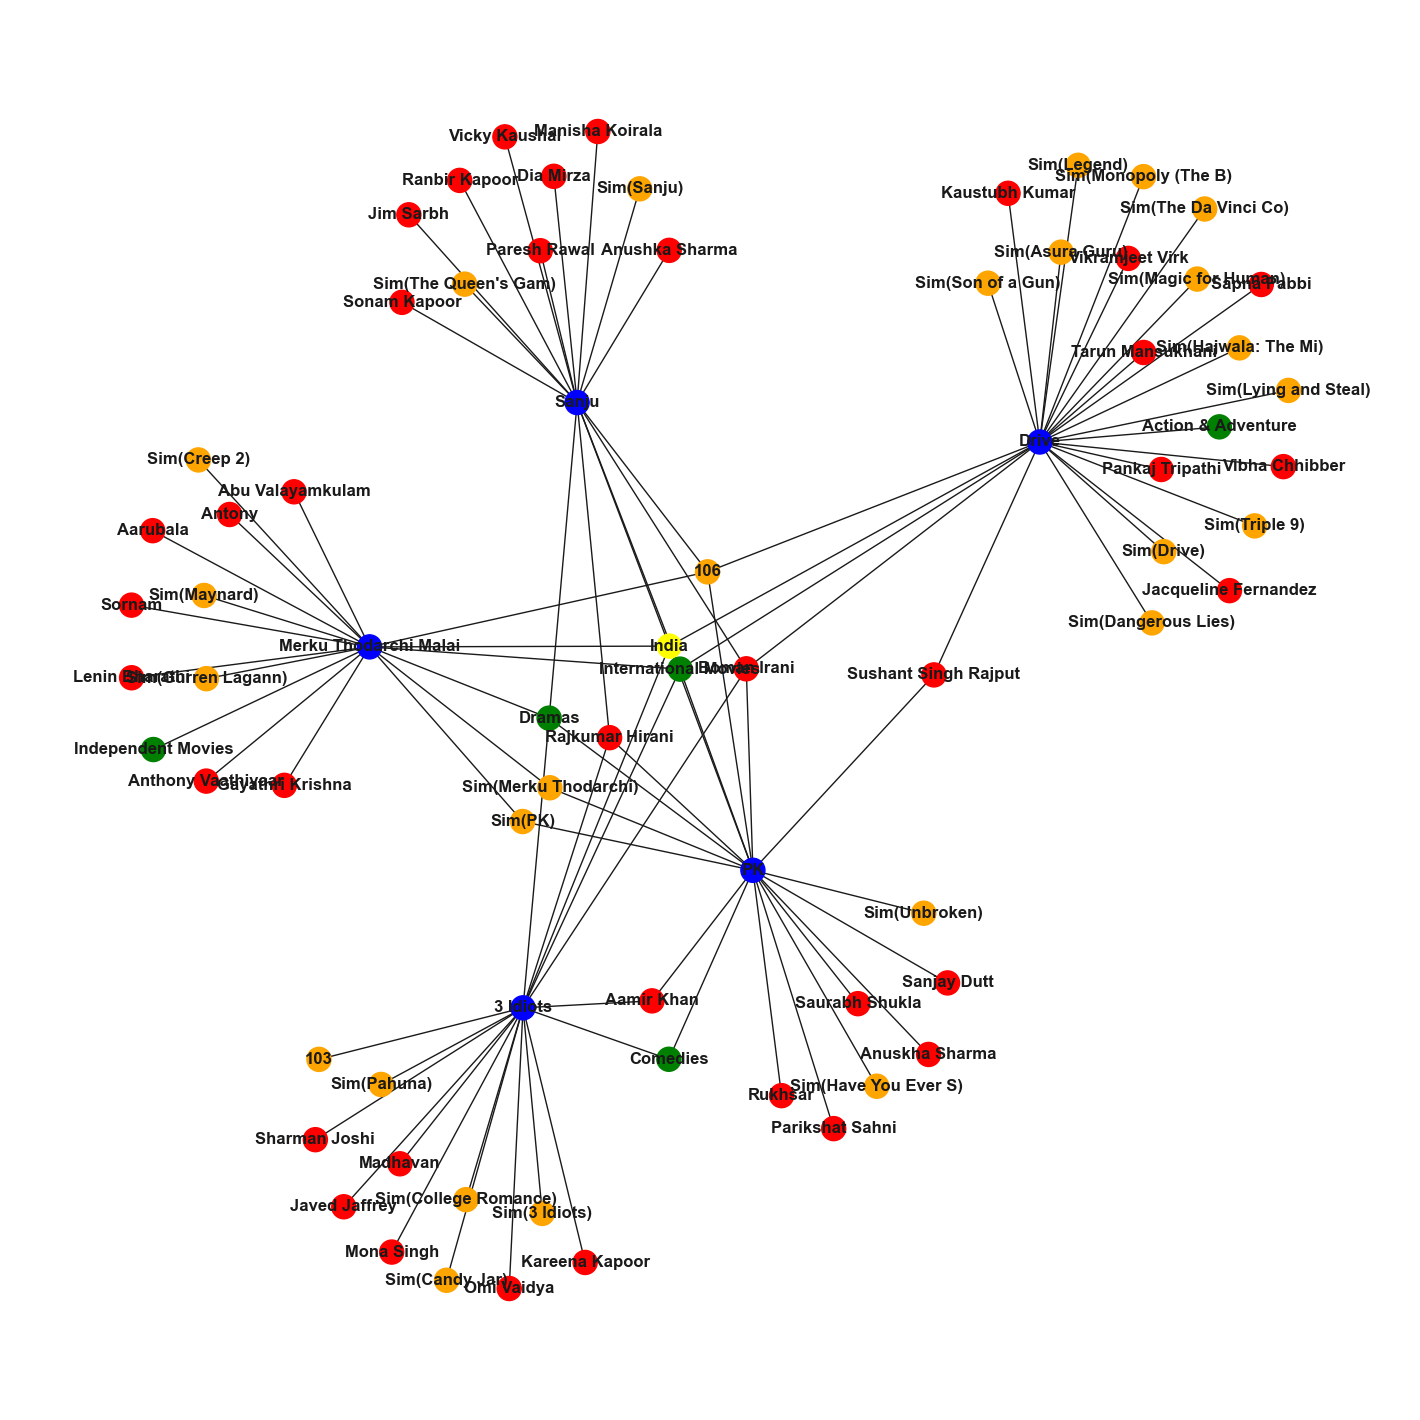

In [54]:
#visualizing the recommendation for "PK"

reco=list(final1.index[:4].values)
reco.extend(["PK"])
sub_graph = get_all_adj_nodes(reco)
draw_sub_graph(sub_graph)